In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# demand.csv = Hourly_OverviewSearch_1.csv
# supply.csv = Hourly_DriverActivity_1.csv
demand = pd.read_csv(r'demand.csv')
supply = pd.read_csv(r'supply.csv')

In [19]:
demand.head()

,Date,Taxify: People saw 0 cars (unique),Taxify: People saw +1 cars (unique),Taxify: Coverage Ratio (unique)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87


In [20]:
supply.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0


Let's define first demand and supply.

since we are in taxi business so 

**demand** = no of rides demanded/looked after by customers in that hour.

**supply** = no of rides we could finish in that hour.

In the case of given sample,

demand = **Taxify: People saw 0 cars (unique)** +	**Taxify: People saw +1 cars (unique)**, as these are the number of rides, people were looking for at that hour.

supply = **Finished Rides**

undersupply = **demand - supply**


In [21]:
supply.isnull().sum()

Date                        0
Active drivers              0
Online (h)                  0
Has booking (h)             0
Waiting for booking (h)     0
Busy (h)                    0
Hours per active driver     0
Rides per online hour       0
Finished Rides             45
dtype: int64

In [22]:
supply.fillna(0,inplace=True)

In [23]:
demand.isnull().sum()

Date                                   0
Taxify: People saw 0 cars (unique)     0
Taxify: People saw +1 cars (unique)    0
Taxify: Coverage Ratio (unique)        0
dtype: int64

1. Since we have 5 weeks, we can find which 36 hours each week we were most undersupplied, there might be some duplicates in demand, but that might be a minor consideration.

In [24]:
# Since we are missing a row in demand, let's add it, otherwise we will calculate undersupply wrongly
demand_missing_row = supply[~supply.Date.isin(demand.Date)].index.values[0]
df1 = demand[0:demand_missing_row] 
df2 = demand[demand_missing_row:] 
df1.loc[demand_missing_row] = ('2016-12-07 05',0,0,0) 
demand = pd.concat([df1, df2])    
demand.index = [*range(demand.shape[0])]


In [25]:
demand_supply = pd.merge(demand,supply,on='Date',how='inner')

In [26]:
# Columns to be used later
demand_supply['demand'] = demand_supply['Taxify: People saw 0 cars (unique)'] + demand_supply['Taxify: People saw +1 cars (unique)']
demand_supply['supply'] = demand_supply['Finished Rides']
demand_supply['undersupply'] = demand_supply['demand'] - demand_supply['supply']

demand_supply.head()

,Date,Taxify: People saw 0 cars (unique),Taxify: People saw +1 cars (unique),Taxify: Coverage Ratio (unique),Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,demand,supply,undersupply
0,2016-12-18 23,9,32,78,52,18,6,11,11,0.3,0.67,12.0,41,12.0,29.0
1,2016-12-18 22,29,64,69,59,20,11,9,12,0.3,1.40,28.0,93,28.0,65.0
2,2016-12-18 21,5,39,89,72,25,7,18,15,0.3,0.64,16.0,44,16.0,28.0
3,2016-12-18 20,13,48,79,86,29,7,23,15,0.3,0.52,15.0,61,15.0,46.0
4,2016-12-18 19,12,77,87,82,31,14,17,19,0.4,1.16,36.0,89,36.0,53.0


In [27]:
# Here we can see each week for which date and hour we had max undersuply for the 36 hours where we had max undersupply.
# For each week I sorted the weekdata in decreasing order and took just frst 36 hours showing max undersupply.
hours_36_ew = {}
#foreach week
for i in range(0,673,168):
    weekdata = demand_supply[['Date','undersupply']][i:i+168]
    weekdata.sort_values(by=['undersupply'], inplace=True,ascending=False)
    hours_36_ew['Week: '+ str(i/168 +1)] = weekdata[:36]
    print('Week: '+ str(i/168 +1) + '\n',weekdata[:36])

Week: 1.0
               Date  undersupply
52   2016-12-16 19        234.0
51   2016-12-16 20        197.0
53   2016-12-16 18        184.0
44   2016-12-17 03        155.0
77   2016-12-15 18        153.0
50   2016-12-16 21        152.0
76   2016-12-15 19        142.0
43   2016-12-17 04        134.0
101  2016-12-14 18        132.0
45   2016-12-17 02        128.0
62   2016-12-16 09        128.0
54   2016-12-16 17        124.0
55   2016-12-16 16        121.0
75   2016-12-15 20        121.0
47   2016-12-17 00        119.0
100  2016-12-14 19        111.0
46   2016-12-17 01        106.0
125  2016-12-13 18        104.0
56   2016-12-16 15        103.0
135  2016-12-13 08         95.0
78   2016-12-15 17         93.0
110  2016-12-14 09         92.0
57   2016-12-16 14         89.0
63   2016-12-16 08         85.0
134  2016-12-13 09         85.0
28   2016-12-17 19         85.0
102  2016-12-14 17         85.0
61   2016-12-16 10         84.0
27   2016-12-17 20         84.0
49   2016-12-16 22         82

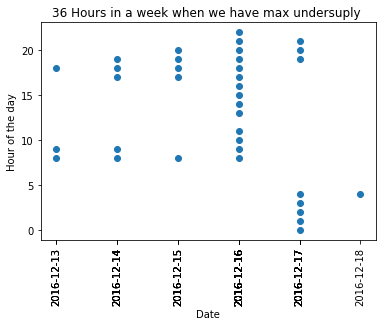

In [28]:
# Lets visualize one week's 36 hours

# x,y preparation for plotting
k = hours_36_ew['Week: 1.0'].sort_index(by=['Date'])
dates = k.Date.str.split(expand=True)
dates.reset_index(inplace=True)
xy = {}
for d in dates[0].unique():
    xy[d] = dates[1][dates[0] == d].values
ds = [((key +' ') * len(xy[key])).split() for key in xy.keys()]
x =  []
for d in ds:
    for l in d:
        x.append(l)
y = []
for key in xy.keys():
    y = y + list(xy[key])
y = [int(i) for i in y]

# simple scatter plot
plt.scatter(x,y)
plt.xticks(x, rotation='vertical')
plt.ylabel('Hour of the day')
plt.xlabel('Date')
plt.title('36 Hours in a week when we have max undersuply ')
plt.show()

2. As we can see from the plot below as the day progresses we have wider gap between demand and supply, probably we could supply more in the evenings. I simply calculated the average/demand supply for each hour over 35 days of data.


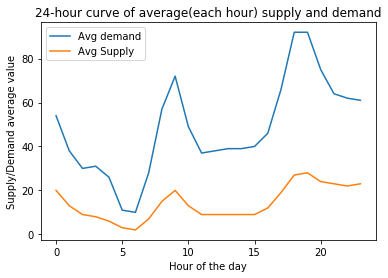

In [29]:
# Preparing x and y for plotting
dates = demand_supply.Date.str.split(expand=True)[0].unique()
avgdemand = []
avgsupply = []

for i in range(24):
    if i in range(10):
        time = '0' + str(i)
    else:    
        time = str(i)
    demands = []
    supplies = []
    for d in dates:
        dpt = (d + ' ' + time)
        demands.append(demand_supply[demand_supply.Date == dpt]['demand'].values[0])
        supplies.append(demand_supply[demand_supply.Date == dpt]['supply'].values[0])
    avgdemand.append(round(sum(demands)/35))
    avgsupply.append(round(sum(supplies)/35))

plt.plot(range(24),avgdemand,label='Avg demand')
plt.plot(range(24),avgsupply,label='Avg Supply')
plt.legend(loc='upper left')
plt.xlabel("Hour of the day")
plt.ylabel('Supply/Demand average value')
plt.title('24-hour curve of average(each hour) supply and demand')
plt.show()

3. Below is the visualization of hours where we lack supply during a weekly period. For example I took first week from the data(first 168 hours).

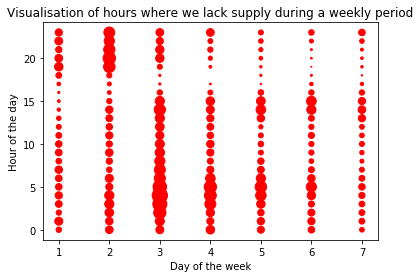

In [30]:
# Prepare x/y for plotting
x = [1]*24 + [2]*24 +[3]*24 +[4]*24 +[5]*24 +[6]*24 +[7]*24
y = list(range(24)) + list(range(24)) + list(range(24)) + list(range(24)) + list(range(24))+list(range(24)) + list(range(24))

# Scatterplot where size of dot shows the undersupply amount, bigger the dot more undersupply
plt.scatter(x,y,s=demand_supply['undersupply'][:168].values, color='red')
plt.xlabel('Day of the week')
plt.ylabel('Hour of the day')
plt.title('Visualisation of hours where we lack supply during a weekly period')
plt.show()

4. *Estimate number of hours needed to ensure we have high Coverage Ratio during most peak hours.*

Assumption: High coverage ratio = 100% coverage., most peak hours = 36 hours with most undersupply.

Since we are already covering **Taxify: People saw +1 cars (unique)**, to achieve 100% coverage we need to supply rides for **Taxify: People saw 0 cars (unique)** aka **missed coverage** for 36 hours with most undersupply each week.


In [31]:
index = 0
needed_hours = []
needed_rides_wk = []
for week in ['Week: 1.0','Week: 2.0','Week: 3.0','Week: 4.0','Week: 5.0']:
    # so in 1 hour drivers ocover .84 rides, to complete 1 ride they need 100/84 hours (first week example)
    # to complete needed_rides_week they need needed_rides_week * 100/84 hours for this week
    # each week avg rph is different
    needed_rides_week = sum(demand_supply[demand_supply.Date.isin(hours_36_ew[week].Date)]['Taxify: People saw 0 cars (unique)'])
    needed_rides_wk.append(needed_rides_week)
    avg_rph = demand_supply[index:index + 168]['Rides per online hour'].mean()
    needed_hours_week = needed_rides_week * (1/avg_rph)
    needed_hours.append(needed_hours_week)
    index = index + 168
print("Total Hours needed to ensure high Coverage Ratio during most peak hours = ", round(sum(needed_hours)))


Total Hours needed to ensure high Coverage Ratio during most peak hours =  8729


5.  we have calculated the extra hours we want to get to capture missed demand (Taxify: People saw 0 cars (unique) aka missed coverage) in previous part.

In this case we need overall average **RPH** as we need to estimate the RPH in general, not for that specific period.  


In [32]:
gen_avg_rph = demand_supply['Rides per online hour'].mean()

# Since we already know needed rides for 36 most undersupplied hours, we can calculate guaranteed hourly earnings
# as follows:
# total needed rides to fulfil  “missed coverage”  in 36 most undersupplied hours
needed_rides = sum(needed_rides_wk)
# Since each completed ride  = 8 Euro (80% goes to driver)
# total monetary value of this missed coverage is: 43464 Euro

mon_val = needed_rides * 8

# total hours drivers need to be online to fulfil this missed coverage will be different than above (but not by much), as we
# use gen_avg_rph here than for specific week, since we are looking for a general case here. needed_hours = rides count * time 
# to complete one ride

needed_hours = round(needed_rides * (1/gen_avg_rph))

guaranteed_hrly_erngs = mon_val / needed_hours

# Since we need guaranteed earning for 3 hour periods

ghe_3Hp = 3 * guaranteed_hrly_erngs

print("Estimated guaranteed hourly earnings over 3 online hours for drivers is Euro",round(ghe_3Hp), 'appoximately')


Estimated guaranteed hourly earnings over 3 online hours for drivers is Euro 14 appoximately
